**Homework 4**  
**Math 510**  

Name: Mitchell Rimerman

For this assignment use pandas and the diamonds data set from class. The code should load the data from the current working directory (i.e. just call the file name, not referencing a specific path). Each question should be answered by the code in the cell after it.

Before submitting your homework under the `Kernel` menu click `Restart & Run All` to rerun your notebook top to bottom. Make sure to check the last code cell to see that all cells were run.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

1\. Load in the diamonds data set (as we did in class).  

In [2]:
diamonds = pd.read_csv("diamonds.csv")

    a. What are the names and types for each of the columns in the data set?  

In [3]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

    b. What is the most common `cut` of the diamonds in the data set?  

In [4]:
diamonds['cut'].mode()

0    Ideal
dtype: object

    c. What are the average prices for diamonds < 1 carat and >= 1 carat?  

In [5]:
price_cl1 = diamonds[diamonds['carat'] < 1]['price'].mean()
price_cge1 = diamonds[diamonds['carat'] >= 1]['price'].mean()
print(f'${price_cl1} is the average price for diamonds < 1 carat.\n${price_cge1} is the average price for diamonds >= 1 carat')

$1632.6408256880734 is the average price for diamonds < 1 carat.
$8142.11463798531 is the average price for diamonds >= 1 carat


2\. The following might be easiest to solve using pandas methods we did not cover in class. Use google and documentation as necessary to solve the problems.  

    a. How many unique prices are in the `price` column?  

In [6]:
diamonds[['price']].nunique()

price    11602
dtype: int64

    b. What is the correlation between a diamonds `price` and `carat`?  

In [7]:
diamonds.price.corr(diamonds.carat)

0.9215913011934779

    c. What is the total value of the transactions captured in the diamonds data set?  

In [8]:
diamonds['price'].sum()

212135217

3\. Using pandas and the diamonds data set from class  

    a. Create a new column `price_01` that for each observation (row) applies a linear scaling of the price where 0 corresponds to the minimum price in the data set and 1 corresponds to the maximum price  

In [9]:
diamonds['price_01'] = (diamonds['price']-diamonds['price'].min())/(diamonds['price'].max()-diamonds['price'].min())
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_01
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.000000
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.000000
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.000054
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.000433
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.000487
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.131427
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.131427
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.131427
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.131427


    b. Create a new column `size` that contains 'small', 'medium', or 'large' depending if the `carat` value is in the bottom quartile, one of the two middle quartiles, or the largest quartile respectively  

In [10]:
conditions = [
    diamonds.carat.rank(pct = True) < .25,
    diamonds.carat.rank(pct = True) < .75,
]
choices = [
    'small','medium'
]
diamonds['size'] = np.select(conditions, choices, default = 'large')
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_01,size
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.000000,small
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.000000,small
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.000054,small
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.000433,small
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.000487,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.131427,medium
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.131427,medium
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.131427,medium
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.131427,medium


    c. Create a new data frame `exp_diamonds` that only includes prices >1000 **and** ideal or premium cuts  

In [11]:
exp_diamonds = diamonds[(diamonds['price'] > 1000) & ((diamonds['cut'] == 'Ideal') | (diamonds['cut'] == 'Premium'))].copy()
exp_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_01,size
90,91,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57,0.131427,medium
92,93,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50,0.131427,medium
99,100,0.80,Premium,H,SI1,61.5,58.0,2760,5.97,5.93,3.66,0.131589,medium
101,102,0.75,Premium,E,SI1,59.9,54.0,2760,6.00,5.96,3.58,0.131589,medium
102,103,0.74,Ideal,G,SI1,61.6,55.0,2760,5.80,5.85,3.59,0.131589,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,0.131373,medium
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,0.131427,medium
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.131427,medium
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.131427,medium


    
    d. What is the average carat of each color diamond?

In [12]:
color_list=['D','E','F','G','H','I','J']
{letter:diamonds[diamonds['color'] == letter].carat.mean() for letter in color_list}

{'D': 0.6577948339483638,
 'E': 0.6578666938859029,
 'F': 0.7365384615384752,
 'G': 0.7711902231668719,
 'H': 0.9117991329480007,
 'I': 1.026927333087436,
 'J': 1.1621367521367572}

4\. Using pandas and the diamonds data set from class  

    a. Plot the density of the prices  

<AxesSubplot:ylabel='Density'>

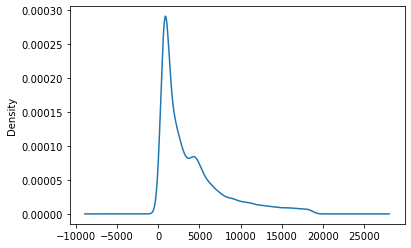

In [13]:
diamonds.price.plot.density()

    
    b. Log10 transform the prices and plot the density  

<AxesSubplot:ylabel='Density'>

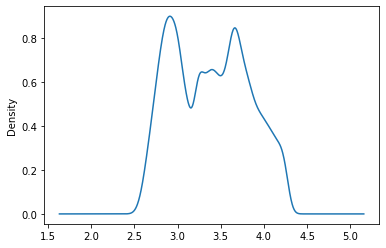

In [14]:
diamonds.loc[:,'logprice'] = diamonds['price'].apply(lambda x: np.log10(x))
diamonds.logprice.plot.density()

    
    c. Make a scatter plot of transformed prices vs carat for diamonds with ideal cut and E color  

<AxesSubplot:xlabel='carat', ylabel='logprice'>

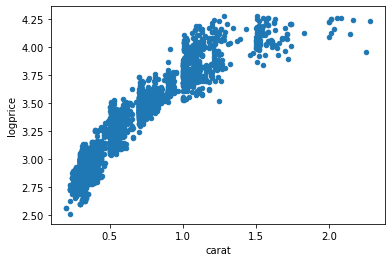

In [15]:
diamonds[(diamonds['cut'] == 'Ideal') & (diamonds['color'] == 'E')].plot.scatter(x='carat',y='logprice')

    
    d. Groupy all diamonds less than 1 carat by cut and make a boxplot of their log transformed prices

Fair              AxesSubplot(0.1,0.679412;0.363636x0.220588)
Good         AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Ideal             AxesSubplot(0.1,0.414706;0.363636x0.220588)
Premium      AxesSubplot(0.536364,0.414706;0.363636x0.220588)
Very Good             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

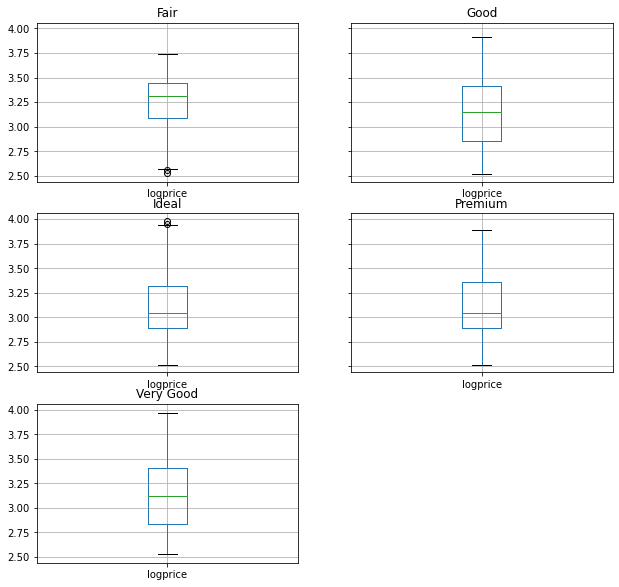

In [16]:
diamonds[diamonds['carat'] < 1].groupby('cut').boxplot(column = 'logprice',figsize=(10,10))